In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


#Code Example

#Code 1

#Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

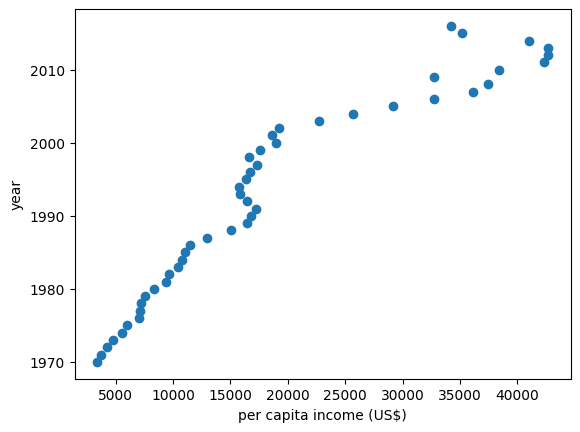

In [ ]:
plt.ylabel('year')
plt.xlabel('per capita income (US$)')
plt.scatter(df['per capita income (US$)'],df['year'])
plt

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X=df[['year']], y=df['per capita income (US$)'])

LinearRegression()

In [ ]:
LR.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
m = LR.coef_

In [ ]:
c = LR.intercept_

In [ ]:
y = (m * 2020) + c

In [ ]:
y

array([41288.69409442])

# Data Preprocessing and multilinear regression

In [ ]:
df1 = pd.read_csv('hiring.csv')
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df1.experience = df1.experience.fillna('zero')


In [ ]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
 pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=6e9bc9f5bed71965e156c2e4d1543e1845ace67e4eddf62564eb47c72d43ab4b
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
from word2number import w2n

In [ ]:
df1['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [ ]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df1['experience'][1]

'zero'

In [ ]:
count = 0
for i in df1['experience']:
  print(i)
  i = w2n.word_to_num(i)
  print(i)
  df1['experience'][count] = i
  count = count + 1

zero
0
zero
0
five
5
two
2
seven
7
three
3
ten
10
eleven
11


<ipython-input-19-b8b025bc7842>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['experience'][count] = i


In [ ]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
import math
df1['test_score(out of 10)']=df1['test_score(out of 10)'].fillna(math.floor(df1['test_score(out of 10)'].median()))


In [ ]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
df1 = df1.rename(columns={'salary($)': 'salary'})

In [ ]:
LR1 = LinearRegression()

In [ ]:
print(df1['experience'].shape)
print(df1['test_score(out of 10)'].shape)
print(df1['interview_score(out of 10)'].shape)
print(df1['salary'].shape)

(8,)
(8,)
(8,)
(8,)


In [ ]:
LR1 = LinearRegression()
LR1.fit(X=df1[['experience','test_score(out of 10)','interview_score(out of 10)']], y=df1['salary'])

LinearRegression()

In [ ]:
LR1.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
LR1.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

#Gradient Descent

In [ ]:
df2 = pd.read_csv('test_scores.csv')
df2

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
import numpy as np
import math
x = np.array(df2['math'])
y = np.array(df2['cs'])

In [ ]:
x

array([92, 56, 88, 70, 80, 49, 65, 35, 66, 67])

In [ ]:
y

array([98, 68, 81, 80, 83, 52, 66, 30, 68, 73])

In [ ]:
def gradient_descent(x,y):
  m = c = 0
  n = len(x)
  iterations = 70
  learning_rate = 0.000200
  for i in range(iterations):
    predict_y =  m*x + c
    cost = (1/n)*sum([val**2 for val in (y - predict_y)])
    cost_thres = cost
    dm = -(2/n)*sum(x*(y-predict_y))
    dc = -(2/n)*sum(y-predict_y)
    c = c - learning_rate * dc
    m = m - learning_rate * dm
    print("m:"+str(m))
    print("c:"+str(c))
    print(i+1)
    print(cost)

In [ ]:
gradient_descent(x,y)

m:1.9783600000000003
c:0.027960000000000002
1
5199.1
m:0.20975041279999962
c:0.0030470367999999894
2
4161.482445460163
m:1.7908456142986242
c:0.025401286955264
3
3332.2237319269248
m:0.37738163667530467
c:0.005499731626422651
4
2669.4843523161976
m:1.6409848166378898
c:0.023373894401807944
5
2139.826383775145
m:0.5113514173939655
c:0.0074774305434828076
6
1716.5264071567592
m:1.5212165764726306
c:0.021771129698498662
7
1378.2272007804495
m:0.6184191426785134
c:0.009075514323270572
8
1107.8601808918404
m:1.4254981563597626
c:0.020507724625171385
9
891.7842215178443
m:0.7039868810749315
c:0.010370210797388455
10
719.0974036421305
m:1.3490002310389348
c:0.01951553325074733
11
581.0869686205
m:0.7723719384951477
c:0.01142244086408669
12
470.7897237271261
m:1.2878632281408475
c:0.018740093691150705
13
382.6407204862143
m:0.8270246840299113
c:0.012280892197750798
14
312.1924801681589
m:1.2390025969113474
c:0.01813788028359247
15
255.89060022344475
m:0.8707026352388424
c:0.012984475742007832


In [ ]:
min_cost = 31.81218732041362
min_cost

31.81218732041362

#Saving model using pickle

In [ ]:
import pickle

In [ ]:
with open('linear_regression_model_pickle','wb') as f:
  pickle.dump(LR,f)

In [ ]:
with open('linear_regression_model_pickle','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
with open('linear_regression_model1_pickle','wb') as f:
  pickle.dump(LR1,f)

In [ ]:
with open('linear_regression_model1_pickle','rb') as f:
  mp1 = pickle.load(f)

In [ ]:
mp1.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

#One-hot encoding and Logistic Regression for multiple variable

In [ ]:
df2 = pd.read_csv('carprices.csv')
df2

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies = pd.get_dummies(df2['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
merged = pd.concat([df2,dummies],axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final = merged.drop(['Car Model','Audi A5'],axis = 'columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [ ]:
X = final.drop('Sell Price($)',axis = 'columns').values
X

array([[69000,     6,     1,     0],
       [35000,     3,     1,     0],
       [57000,     5,     1,     0],
       [22500,     2,     1,     0],
       [46000,     4,     1,     0],
       [59000,     5,     0,     0],
       [52000,     5,     0,     0],
       [72000,     6,     0,     0],
       [91000,     8,     0,     0],
       [67000,     6,     0,     1],
       [83000,     7,     0,     1],
       [79000,     7,     0,     1],
       [59000,     5,     0,     1]])

In [ ]:
Y = final['Sell Price($)'].values
Y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [ ]:
LR2 =LinearRegression()

In [ ]:
LR2.fit(X,Y)

LinearRegression()

In [ ]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
LR2.predict([[45000,4,0,1]])

array([36991.31721061])

In [ ]:
LR2.predict([[86000,7,1,0]])

array([11080.74313219])

In [ ]:
LR2.score(X,Y)

0.9417050937281083

#Data visualization, splitting of training and testing data

In [ ]:
df3 = pd.read_csv('HR_comma_sep.csv')
df3

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
X = df3.drop('left',axis='columns')
len(X)

14999

In [ ]:
Y = df3.left
len(Y)

14999

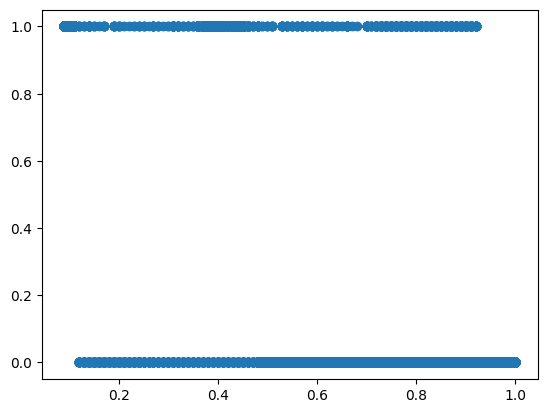

In [ ]:
plt.scatter(X['satisfaction_level'],Y)


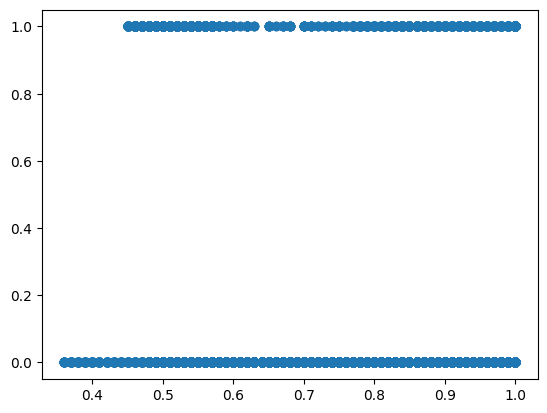

In [ ]:
plt.scatter(X['last_evaluation'],Y)

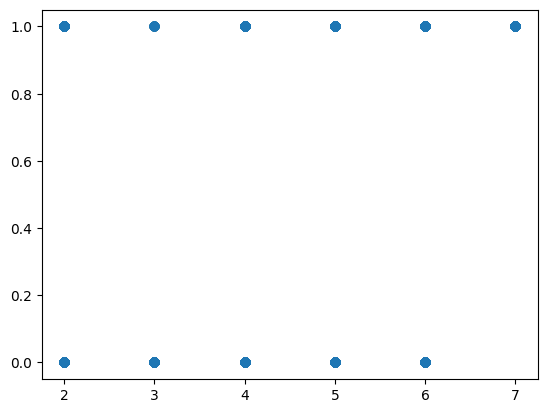

In [ ]:
plt.scatter(X['number_project'],Y)

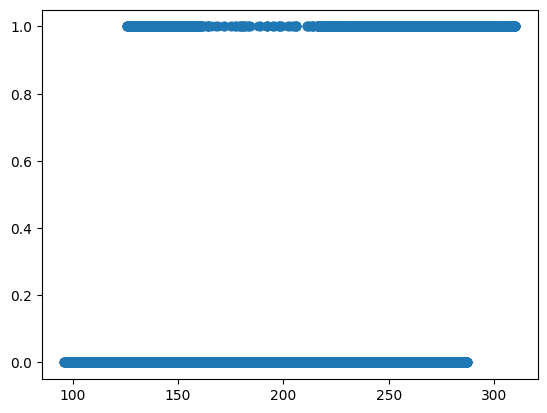

In [ ]:
plt.scatter(X['average_montly_hours'],Y)

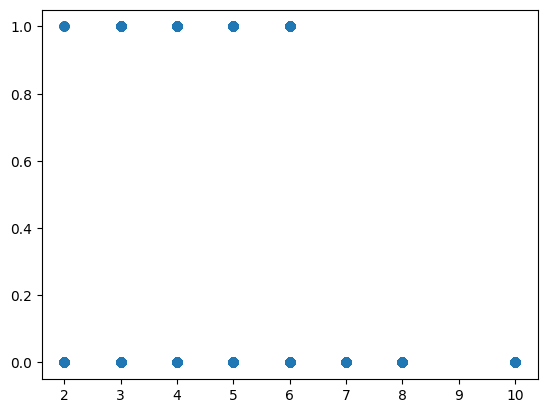

In [ ]:
plt.scatter(X['time_spend_company'],Y)

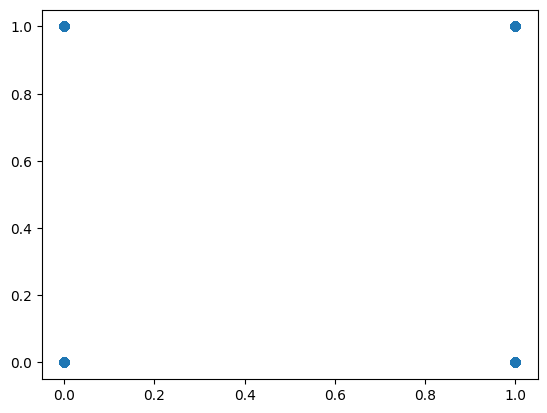

In [ ]:
plt.scatter(X['Work_accident'],Y)

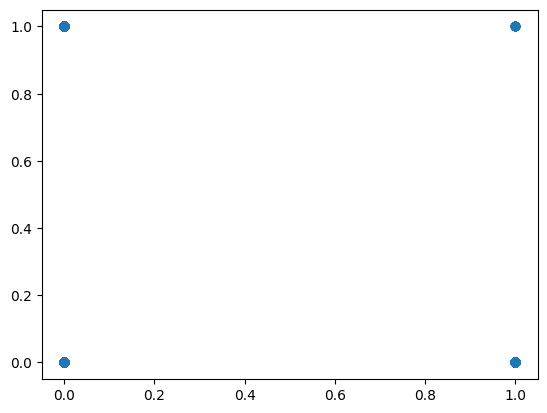

In [ ]:
plt.scatter(X['promotion_last_5years'],Y)

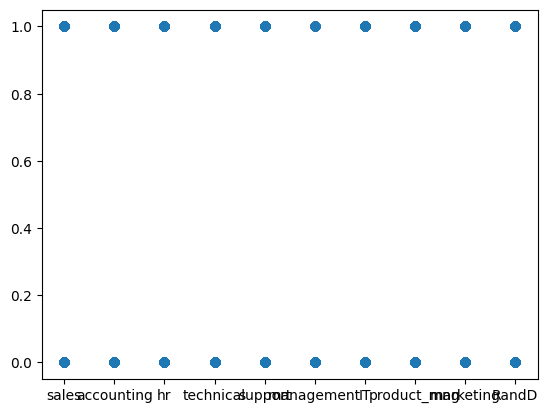

In [ ]:
plt.scatter(X['Department'],Y)

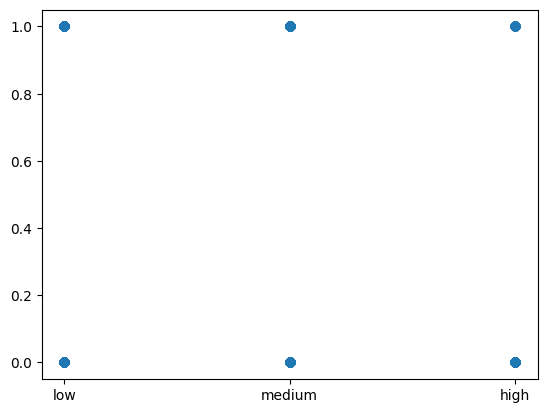

In [ ]:
plt.scatter(X['salary'],Y)

<Axes: xlabel='salary'>

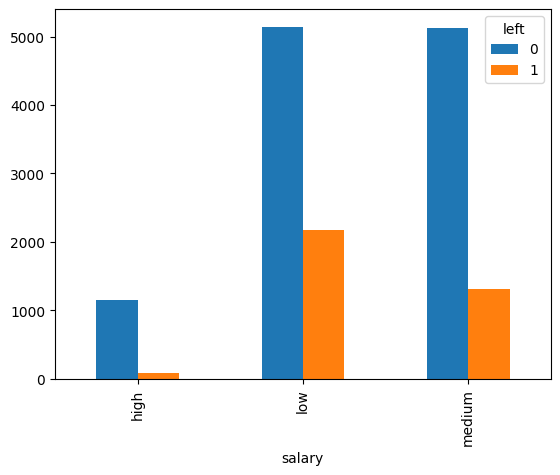

In [ ]:
pd.crosstab(df3.salary,df3.left).plot(kind='bar')

<Axes: xlabel='Department'>

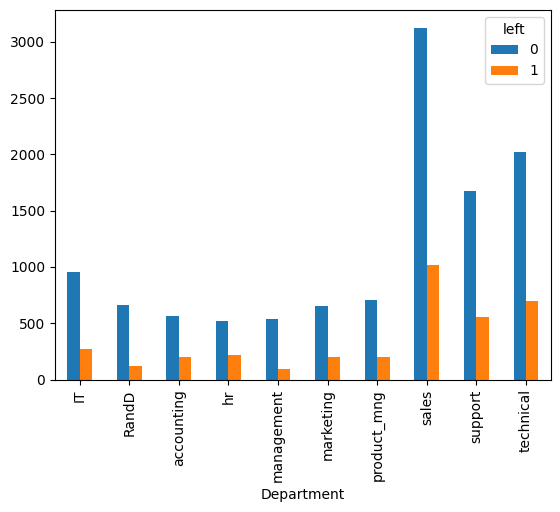

In [ ]:
pd.crosstab(df3.Department,df3.left).plot(kind = 'bar')

In [ ]:
X_relevant = df3[['satisfaction_level','last_evaluation','average_montly_hours']]
X_relevant

,satisfaction_level,last_evaluation,average_montly_hours
0,0.38,0.53,157
1,0.80,0.86,262
2,0.11,0.88,272
3,0.72,0.87,223
4,0.37,0.52,159
...,...,...,...
14994,0.40,0.57,151
14995,0.37,0.48,160
14996,0.37,0.53,143
14997,0.11,0.96,280


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_relevant,Y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogR = LogisticRegression()

In [ ]:
LogR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
LogR.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
Y_test

12274    1
12127    1
10126    0
10941    0
9745     0
        ..
1878     1
1999     1
5826     0
5818     0
157      1
Name: left, Length: 3000, dtype: int64

In [ ]:
LogR.score(X_test,Y_test)

0.7786666666666666

#Multi class classification using logistic Regression

In [ ]:

from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()

In [ ]:
df4 = pd.DataFrame(data = iris_dataset.data)

In [ ]:
df4['target'] = iris_dataset.target

In [ ]:
df4

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df4[[0,1,2,3]],df4['target'],test_size = 0.2)

In [ ]:
LogR1 = LogisticRegression()

In [ ]:
LogR1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogR1.predict(X_test)

array([1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 1])

In [ ]:
Y_test

98     1
64     1
90     1
94     1
112    2
7      0
10     0
18     0
11     0
69     1
109    2
144    2
93     1
79     1
51     1
12     0
145    2
92     1
33     0
95     1
5      0
22     0
114    2
113    2
8      0
104    2
1      0
36     0
25     0
54     1
Name: target, dtype: int64

In [ ]:
LogR1.score(X_test,Y_test)

1.0

#Feature Selection, One-hot Encoding and Decision tree classifier

In [ ]:
titanic_dataset = pd.read_csv('titanic.csv')

In [ ]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df5 = titanic_dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 'columns')

In [ ]:
df5

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [ ]:
dummies = pd.get_dummies(df5['Sex'])

In [ ]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
df5 = pd.concat([df5,dummies],axis='columns')

In [ ]:
import math
df5['Age'] = df5['Age'].fillna(math.floor(df5['Age'].median()))

In [ ]:
df5 = df5.drop('Sex',axis='columns')

In [ ]:
df5

,Survived,Pclass,Age,female,male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
...,...,...,...,...,...
886,0,2,27.0,0,1
887,1,1,19.0,1,0
888,0,3,28.0,1,0
889,1,1,26.0,0,1


In [ ]:
target = df5['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
inputs = df5.drop('Survived',axis='columns')
inputs

,Pclass,Age,female,male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
886,2,27.0,0,1
887,1,19.0,1,0
888,3,28.0,1,0
889,1,26.0,0,1


In [ ]:
from sklearn import tree

In [ ]:
DT = tree.DecisionTreeClassifier()

In [ ]:
DT.fit(inputs,target)

DecisionTreeClassifier()

In [ ]:
DT.score(inputs,target)

0.877665544332211

#SVM and Confusion matrix

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits_dataset = load_digits()

In [ ]:
digits_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<Figure size 640x480 with 0 Axes>

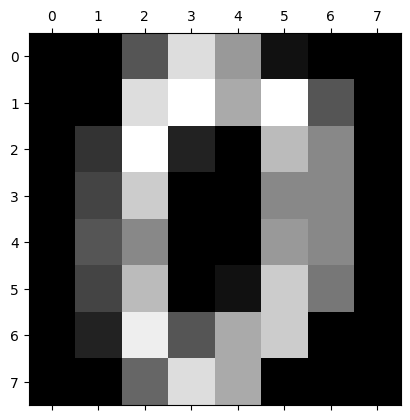

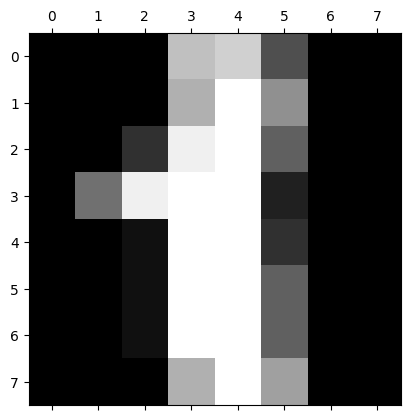

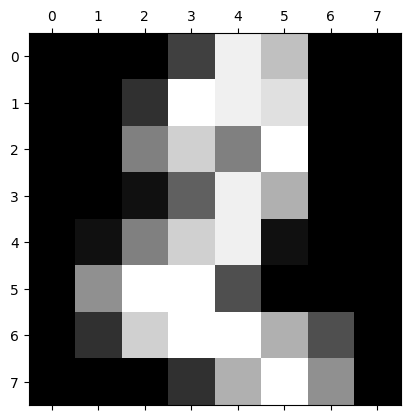

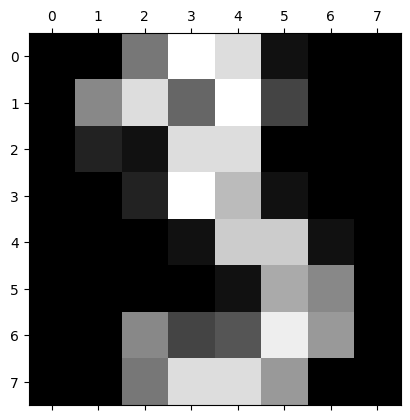

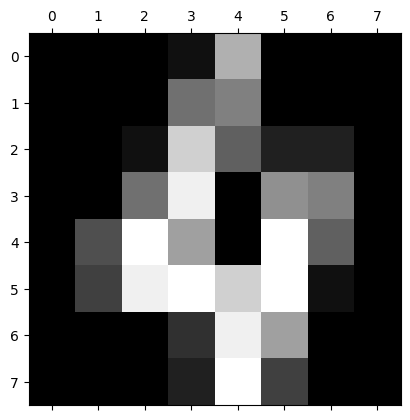

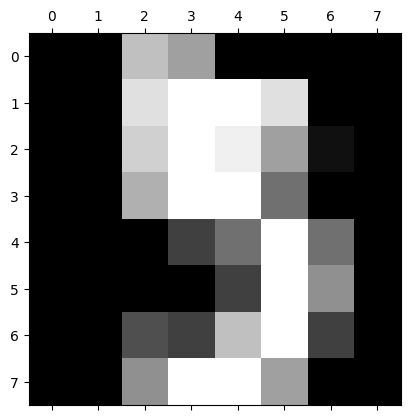

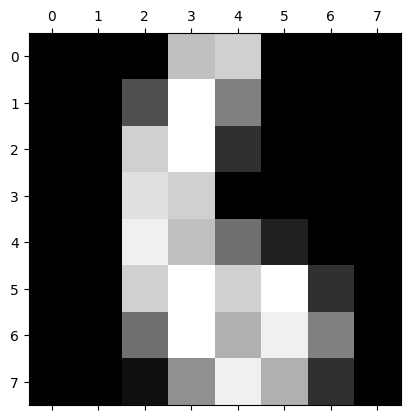

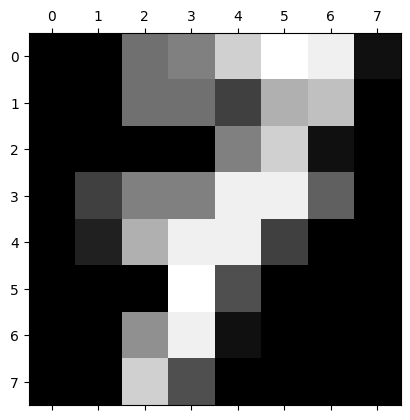

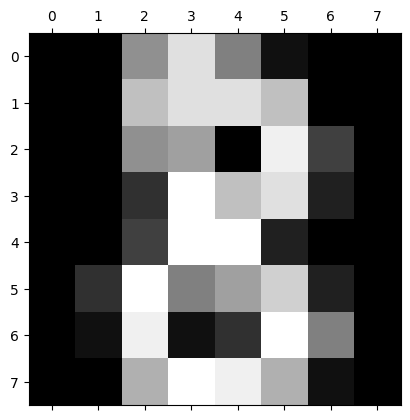

In [ ]:
plt.gray()
for i in range(9):
  plt.matshow(digits_dataset.images[i])

In [ ]:
df6 = pd.DataFrame(data = digits_dataset.data)

In [ ]:
df6

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(digits_dataset.data,digits_dataset.target,train_size = 0.8)

In [ ]:
SVM = SVC()

In [ ]:
SVM.fit(X_train,Y_train)

SVC()

In [ ]:
y_predict = SVM.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_test

array([7, 5, 4, 3, 5, 7, 9, 0, 4, 7, 9, 7, 8, 2, 4, 8, 5, 5, 0, 2, 6, 1,
       7, 2, 6, 5, 5, 1, 9, 4, 7, 1, 1, 2, 9, 5, 1, 8, 8, 3, 6, 4, 6, 9,
       6, 5, 4, 1, 1, 1, 0, 9, 5, 4, 6, 2, 0, 5, 5, 8, 9, 8, 9, 0, 5, 3,
       2, 7, 6, 6, 3, 5, 6, 7, 9, 6, 9, 7, 4, 9, 3, 2, 4, 1, 3, 6, 4, 6,
       9, 4, 9, 5, 9, 7, 4, 1, 2, 1, 7, 3, 0, 9, 0, 6, 3, 2, 2, 8, 4, 4,
       2, 1, 6, 5, 5, 8, 0, 3, 1, 6, 2, 2, 7, 2, 7, 2, 9, 2, 3, 4, 0, 5,
       5, 9, 7, 9, 6, 8, 8, 1, 9, 1, 8, 8, 2, 0, 6, 6, 4, 8, 6, 3, 9, 8,
       1, 9, 2, 3, 6, 6, 5, 7, 7, 2, 8, 9, 6, 1, 4, 5, 5, 3, 4, 6, 7, 0,
       2, 1, 0, 5, 4, 1, 5, 4, 0, 0, 0, 8, 8, 4, 0, 8, 3, 6, 7, 1, 2, 4,
       5, 0, 0, 1, 6, 0, 9, 6, 8, 0, 0, 4, 0, 3, 2, 5, 7, 9, 7, 9, 8, 6,
       0, 7, 6, 1, 5, 5, 9, 6, 2, 5, 4, 0, 9, 2, 2, 9, 8, 1, 8, 5, 0, 2,
       0, 4, 7, 7, 6, 4, 0, 5, 3, 6, 2, 5, 1, 3, 9, 3, 3, 5, 8, 3, 8, 7,
       6, 5, 9, 0, 5, 9, 5, 7, 6, 9, 3, 2, 3, 6, 8, 9, 1, 7, 9, 0, 9, 0,
       1, 2, 9, 7, 1, 7, 0, 1, 0, 4, 5, 2, 1, 3, 3,

In [ ]:
y_predict

array([7, 5, 4, 3, 5, 7, 9, 0, 4, 7, 9, 7, 8, 2, 4, 8, 5, 5, 0, 2, 6, 1,
       7, 2, 6, 5, 5, 1, 9, 4, 7, 1, 1, 2, 9, 5, 1, 8, 8, 3, 6, 4, 6, 9,
       6, 5, 4, 1, 1, 1, 0, 9, 5, 4, 6, 2, 0, 5, 5, 8, 9, 8, 9, 0, 5, 3,
       2, 7, 6, 6, 3, 5, 6, 7, 9, 6, 9, 7, 4, 9, 3, 2, 4, 1, 3, 6, 4, 6,
       9, 4, 9, 5, 9, 7, 4, 1, 2, 1, 7, 3, 0, 9, 0, 6, 3, 2, 2, 8, 4, 4,
       2, 1, 6, 5, 5, 8, 0, 3, 1, 6, 2, 2, 7, 2, 7, 2, 9, 2, 3, 4, 0, 5,
       5, 9, 7, 9, 6, 8, 8, 1, 9, 1, 8, 8, 2, 0, 6, 6, 4, 8, 6, 3, 9, 8,
       1, 9, 2, 3, 6, 6, 5, 7, 7, 2, 8, 9, 6, 1, 4, 5, 5, 3, 4, 6, 7, 0,
       2, 1, 0, 5, 4, 1, 5, 4, 0, 0, 0, 8, 1, 4, 0, 8, 3, 6, 7, 1, 2, 4,
       5, 0, 0, 1, 6, 0, 3, 6, 8, 0, 0, 4, 0, 3, 2, 5, 7, 9, 7, 9, 8, 6,
       0, 7, 6, 1, 5, 5, 9, 6, 2, 5, 4, 0, 9, 2, 2, 9, 8, 1, 8, 5, 0, 2,
       0, 4, 7, 7, 6, 4, 0, 5, 3, 6, 2, 5, 1, 3, 9, 3, 3, 5, 8, 3, 8, 7,
       6, 5, 9, 0, 5, 9, 5, 7, 6, 9, 3, 2, 3, 6, 8, 9, 1, 7, 9, 0, 9, 0,
       1, 2, 9, 7, 1, 7, 0, 1, 0, 4, 5, 2, 1, 3, 3,

In [ ]:
cm = confusion_matrix(Y_test,y_predict)

In [ ]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

Text(158.22222222222223, 0.5, 'Actual digits')

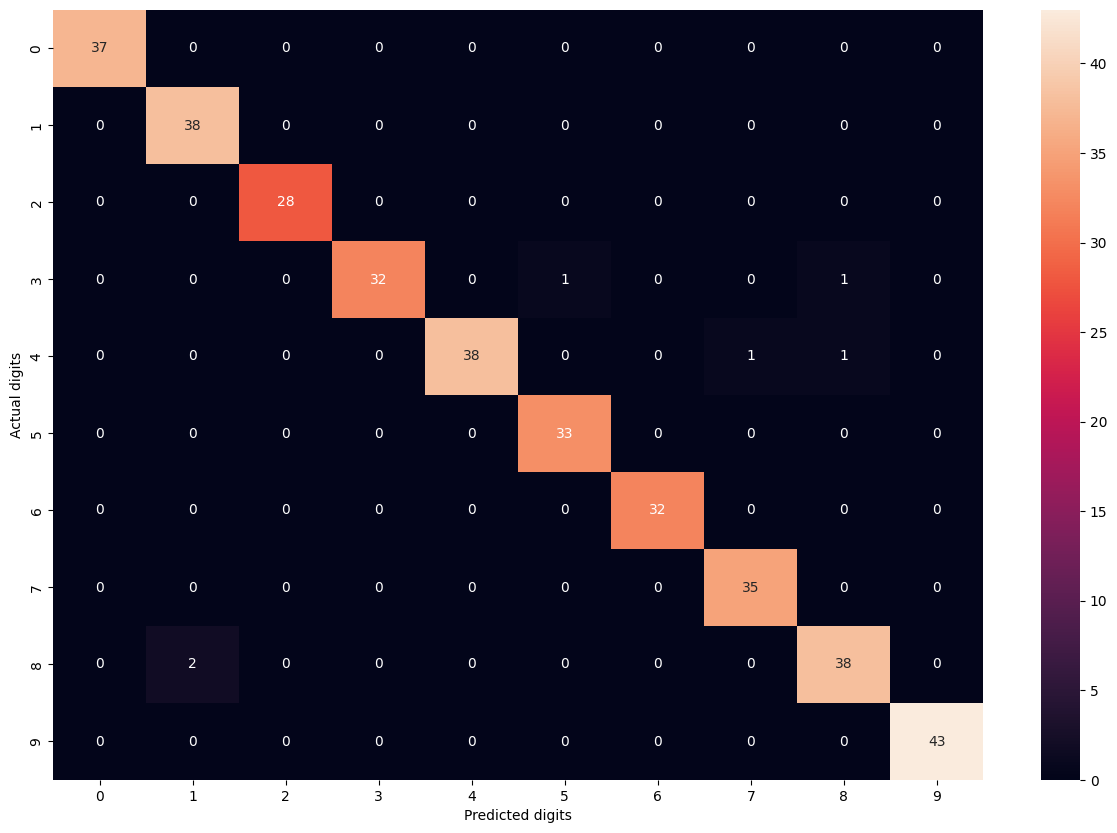

In [ ]:
import seaborn as sn
plt.figure(figsize = (15,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted digits')
plt.ylabel('Actual digits')

In [ ]:
SVM.score(X_test,Y_test)

0.9833333333333333

In [ ]:
Max_score = "default"

#Random Forest

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
df7 = pd.DataFrame(data=iris.data)

In [ ]:
df7['target'] = iris.target

In [ ]:
df7

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df7[[0,1,2,3]],df7['target'],train_size = 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=15)

In [ ]:
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
RF.predict(X_test)

array([1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2])

In [ ]:
Y_test

106    2
138    2
63     1
137    2
87     1
125    2
3      0
61     1
112    2
6      0
57     1
1      0
72     1
86     1
129    2
44     0
71     1
52     1
135    2
32     0
116    2
31     0
142    2
47     0
145    2
139    2
91     1
136    2
105    2
148    2
Name: target, dtype: int64

In [ ]:
RF.score(X_test,Y_test)

0.9666666666666667

In [ ]:
Max_score_n = 15

#N fold Cross validation

In [ ]:
df8 = pd.DataFrame(data = iris.data)
df8['target'] = iris.target

In [ ]:
df8

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def get_score(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train)
  return model.score(X_test,Y_test)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
kfold

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Scores_logR = []
Scores_svm = []
Scores_rf = []

In [ ]:
Scores_logR.append(cross_val_score(LogisticRegression(),iris.data,iris.target))
print(Scores_logR)

[array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Scores_svm.append(cross_val_score(SVC(),iris.data,iris.target))
print(Scores_svm)

[array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])]


In [ ]:
Scores_rf.append(cross_val_score(RandomForestClassifier(n_estimators = 8),iris.data,iris.target))
print(Scores_rf)

[array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]), array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]), array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])]


#K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df8 = pd.DataFrame(data = iris.data)
df8

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
km = KMeans(n_clusters = 3)

In [ ]:
km.fit(df8[[0,1]])
y_predict = km.predict(df8[[0,1]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
df8['cluster'] = y_predict
df8

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [ ]:
i1 = df8[df8.cluster == 0]
i1

,0,1,2,3,cluster
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
54,6.5,2.8,4.6,1.5,0
56,6.3,3.3,4.7,1.6,0
58,6.6,2.9,4.6,1.3,0
65,6.7,3.1,4.4,1.4,0
74,6.4,2.9,4.3,1.3,0
75,6.6,3.0,4.4,1.4,0
76,6.8,2.8,4.8,1.4,0


In [ ]:
i2 = df8[df8.cluster == 1]
i2

,0,1,2,3,cluster
53,5.5,2.3,4.0,1.3,1
55,5.7,2.8,4.5,1.3,1
57,4.9,2.4,3.3,1.0,1
59,5.2,2.7,3.9,1.4,1
60,5.0,2.0,3.5,1.0,1
61,5.9,3.0,4.2,1.5,1
62,6.0,2.2,4.0,1.0,1
63,6.1,2.9,4.7,1.4,1
64,5.6,2.9,3.6,1.3,1
66,5.6,3.0,4.5,1.5,1


In [ ]:
i3 = df8[df8.cluster == 2]
i3

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


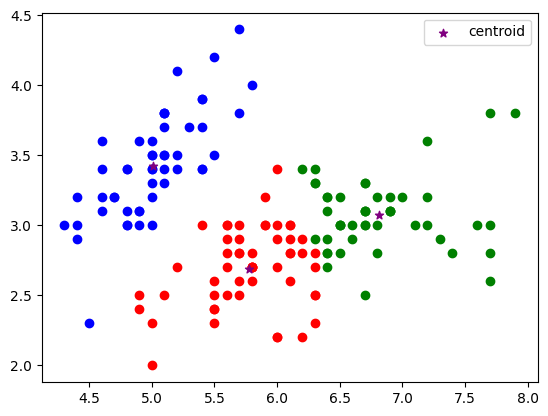

In [ ]:
plt.scatter(i1[0],i1[1],color='green')
plt.scatter(i2[0],i2[1],color='red')
plt.scatter(i3[0],i3[1],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#Naive Bayes and Model Selection

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df9 = pd.DataFrame(data = digits.data)

In [ ]:
df9

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
X = df9
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
Y = pd.DataFrame(data = digits.target)
Y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
LogR3 = LogisticRegression()

In [ ]:
LogR3.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogR3.score(X_test,Y_test)

0.9666666666666667

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
DTC.score(X_test,Y_test)

0.8611111111111112

In [ ]:
SVM1 = SVC()

In [ ]:
SVM1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
SVM1.score(X_test,Y_test)

0.9972222222222222

In [ ]:
NB = GaussianNB()

In [ ]:
NB.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
NB.score(X_test,Y_test)

0.8611111111111112

In [ ]:
MNB = MultinomialNB()

In [ ]:
MNB.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
MNB.score(X_test,Y_test)

0.9194444444444444

#L1 and L2 Regularization

In [ ]:
df10 = pd.read_csv('hiring.csv')
df10

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df10.experience = df10.experience.fillna('zero')

In [ ]:
from word2number import w2n

In [ ]:
df10['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [ ]:
df10['experience']=df10['experience'].apply(w2n.word_to_num)

In [ ]:
df10

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df10['test_score(out of 10)'] = df10['test_score(out of 10)'].fillna(df10['test_score(out of 10)'].median())

In [ ]:
df10

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
X = df10[['experience','test_score(out of 10)','interview_score(out of 10)']]
Y = df10['salary($)']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)

In [ ]:
LR3 = LinearRegression()
L1 = Lasso(alpha=50,max_iter=100,tol=0.1)
L2 = Ridge(alpha=50,max_iter=100,tol=0.1)

In [ ]:
LR3.fit(X_train,Y_train)
L1.fit(X_train,Y_train)
L2.fit(X_train,Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
LR3.score(X_test,Y_test)

0.8854262054139518

In [ ]:
LR3.score(X_train,Y_train)

0.9476835416356598

In [ ]:
L1.score(X_test,Y_test)

0.8476293376269984

In [ ]:
L1.score(X_train,Y_train)

0.9471814725427103

In [ ]:
L2.score(X_test,Y_test)

0.1585170875910753

In [ ]:
L2.score(X_train,Y_train)

0.7981063848343714

#K Nearest Neighbour

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df11 = pd.DataFrame(data=digits.data)

In [ ]:
df11['target'] = digits.target

In [ ]:
df11

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
C0 = df11[df11.target==0].drop(['target'],axis='columns')
C1 = df11[df11.target==1].drop(['target'],axis='columns')
C2 = df11[df11.target==2].drop(['target'],axis='columns')
C3 = df11[df11.target==3].drop(['target'],axis='columns')
C4 = df11[df11.target==4].drop(['target'],axis='columns')
C5 = df11[df11.target==5].drop(['target'],axis='columns')
C6 = df11[df11.target==6].drop(['target'],axis='columns')
C7 = df11[df11.target==7].drop(['target'],axis='columns')
C8 = df11[df11.target==8].drop(['target'],axis='columns')
C9 = df11[df11.target==9].drop(['target'],axis='columns')

In [ ]:
X = df11

In [ ]:
Y = pd.DataFrame(data = digits.target)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
predict_y = knn.predict(X_test)

In [ ]:
cm2 = confusion_matrix(Y_test,predict_y)

In [ ]:
cm2

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 33]])

In [ ]:
knn.score(X_test,Y_test)

0.9916666666666667

#Pricipal Component Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df12 = pd.read_csv('heart.csv')

In [ ]:
df12 = pd.get_dummies(df12)

In [ ]:
df12

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
X = df12.drop(['HeartDisease'],axis='columns')
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
Y = df12['HeartDisease']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.24489796, 0.7       , 0.47927032, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.8       , 0.29850746, ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 0.65      , 0.46932007, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 0.65      , 0.2172471 , ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.65      , 0.39137645, ..., 0.        , 1.        ,
        0.        ],
       [0.20408163, 0.69      , 0.29021559, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)


In [ ]:
LogR4 = LogisticRegression()

In [ ]:
LogR4.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogR4.score(X_test,Y_test)

0.875

In [ ]:
pca = PCA(0.95)

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca_train,X_pca_test,Ytrain,Ytest = train_test_split(X_pca,Y,train_size=0.8)

In [ ]:
LogR4.fit(X_pca_train,Y_train)

LogisticRegression()

In [ ]:
LogR4.score(X_pca_test,Y_test)

0.5380434782608695

#Bagging to Handle overfitting and underfitting



In [ ]:
df13 = pd.read_csv('heart.csv')


In [ ]:
df13

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df13.shape

(918, 12)

In [ ]:
df13[df13.Cholesterol > (df13.Cholesterol.mean() + 3*df13.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [ ]:
df13 = df13[df13.Cholesterol <= (df13.Cholesterol.mean() + 3*df13.Cholesterol.std())]

In [ ]:
df13[df13.RestingBP > (df13.RestingBP.mean() + 3*df13.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [ ]:
df13 = df13[df13.RestingBP <= (df13.RestingBP.mean() + 3*df13.RestingBP.std())]

In [ ]:
df13[df13.MaxHR > (df13.MaxHR.mean() + 3*df13.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df13 = df13[df13.MaxHR <= (df13.MaxHR.mean() + 3*df13.MaxHR.std())]

In [ ]:
df13[df13.Oldpeak > (df13.Oldpeak.mean() + 3*df13.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [ ]:
df13 = df13[df13.Oldpeak <= (df13.Oldpeak.mean() + 3*df13.Oldpeak.std())]

In [ ]:
df13.shape

(902, 12)

In [ ]:
df13.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df13.	RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df13.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df13.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df13.ExerciseAngina.replace ({
    'N' : 0,
    'Y' : 1
},inplace = True)

In [ ]:
df13.ChestPainType.replace({
    'ATA' : 1,
    'NAP' : 2,
    'ASY' : 3,
    'TA' : 4
},inplace = True)

In [ ]:
df13.RestingECG.replace({
    'Normal' : 1,
    'ST' : 2,
    'LVH' : 3
},inplace = True)

In [ ]:
df13.ST_Slope.replace({
    'Up' : 1,
    'Flat' : 2,
    'Down' : 3
},inplace = True)

In [ ]:
df13.Sex.replace({
    'M' : 0,
    'F' : 1
},inplace = True)

In [ ]:
df13 = pd.get_dummies(df13,drop_first=True)

In [ ]:
df13

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,1,0
1,49,1,2,160,180,0,1,156,0,1.0,2,1
2,37,0,1,130,283,0,2,98,0,0.0,1,0
3,48,1,3,138,214,0,1,108,1,1.5,2,1
4,54,0,2,150,195,0,1,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,4,110,264,0,1,132,0,1.2,2,1
914,68,0,3,144,193,1,1,141,0,3.4,2,1
915,57,0,3,130,131,0,1,115,1,1.2,2,1
916,57,1,1,130,236,0,3,174,0,0.0,2,1


In [ ]:
X = df13.drop(['HeartDisease'],axis = 'columns')

In [ ]:
Y = df13.HeartDisease

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)
X_scaled_train,X_scaled_test,Y_train,Y_test = train_test_split(X_scaled,Y,train_size=0.8)

In [ ]:
svm1 = SVC()
svm2 = SVC()

In [ ]:
svm1.fit(X_train,Y_train)
svm2.fit(X_scaled_train,Y_train)

SVC()

In [ ]:
svm1.score(X_test,Y_test)

0.5359116022099447

In [ ]:
svm2.score(X_scaled_test,Y_test)

0.9005524861878453

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
Bag_model = BaggingClassifier(
    base_estimator = SVC(),
    n_estimators = 3
)

In [ ]:
Bag_model.fit(X_scaled_train,Y_train)

In [ ]:
Bag_model.score(X_scaled_test,Y_test)

0.9116022099447514